# Atividade 2

# Gradient Descent Algorithm

## Computing the minimum of a function

Suppose we want to find the minimum of the function $$ f(x,y) = (x-47)^2 + (y - 0.1)^2 + 2. $$

In [14]:
#------------------------
# Import packages
#------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Change the plotting style
plt.style.use('seaborn-v0_8-whitegrid')


We create the functions for our calculations such as $f$ and the gradient of $f$.

In [15]:
#------------------------
# Create functions
#------------------------
# Input into the fuctions is vector X, where X = (x,y)
# Create the function we want to find the minimum of
def f(X):
    #TODO: implement this part of code
    x, y = X
    return (x - 47)**2 + (y - 0.1)**2 + 2
# Create the gradient vector
def gradf(X):
    #TODO: implement this part of code
    x, y = X
    df_dx = 2 * (x - 47)
    df_dy = 2 * (y - 0.1)
    return np.array([df_dx, df_dy])

We can plot $f$ as well.

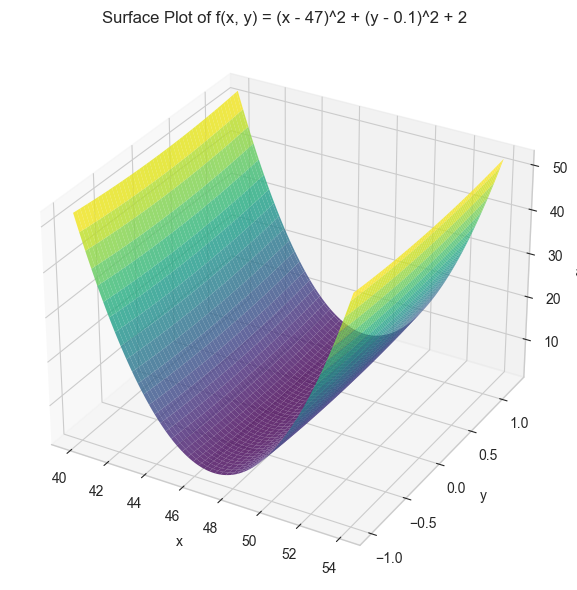

In [16]:
#TODO: implement this part of code
# Create the mesh of points for x and y
x_vals = np.linspace(40, 54, 100)
y_vals = np.linspace(-1, 1.2, 100)
X_grid, Y_grid = np.meshgrid(x_vals, y_vals)

# Calculate the values of Z for the surface
Z_grid = (X_grid - 47)**2 + (Y_grid - 0.1)**2 + 2

# Create the 3D graph
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X_grid, Y_grid, Z_grid, cmap='viridis', alpha=0.8)

# Add labels
ax.set_title('Surface Plot of f(x, y) = (x - 47)^2 + (y - 0.1)^2 + 2')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')

# Show the graph
plt.tight_layout()
plt.show()

Now, we will start our gradient descent algorithm.  Here, we will start at the point $P=(80, 20)$.

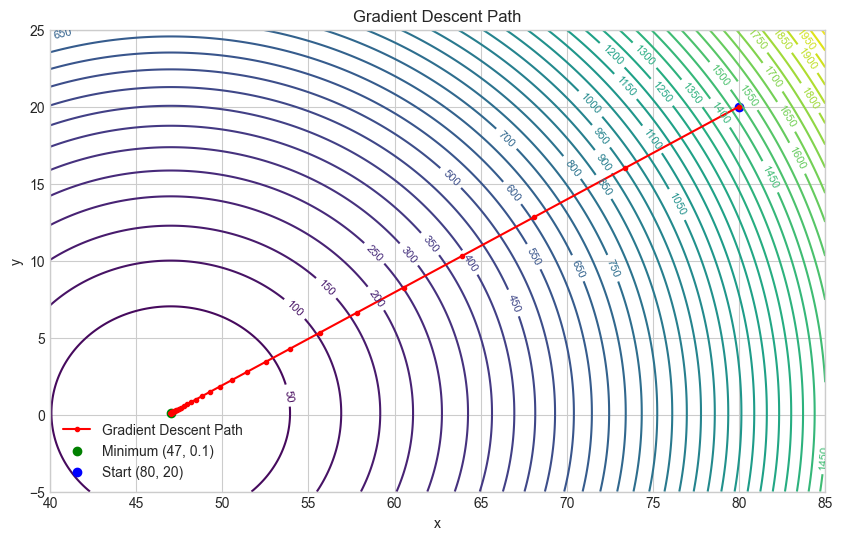

In [17]:
#TODO: implement this part of code
# 1. Gradient descent algorithm
def gradient_descent(f, gradf, x0, alpha=0.05, max_iter=1000, tolerance=1e-6):
    x = np.array(x0, dtype=float)
    path = [x.copy()]

    for _ in range(max_iter):
        grad = gradf(x)
        x_new = x - alpha * grad
        path.append(x_new.copy())
        if np.linalg.norm(x_new - x) < tolerance:
            break
        x = x_new

    return x, path

# 2. Running the gradient descent
start_point = [80, 20]
minimum, path = gradient_descent(f, gradf, start_point, alpha=0.1)

# 3. Visualizing with contour graph + trajectory
x_vals = np.linspace(40, 85, 400)
y_vals = np.linspace(-5, 25, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = (X - 47)**2 + (Y - 0.1)**2 + 2

# Trajectory
path = np.array(path)

# Plotting
plt.figure(figsize=(10, 6))
contours = plt.contour(X, Y, Z, levels=50, cmap='viridis')
plt.clabel(contours, inline=True, fontsize=8)
plt.plot(path[:, 0], path[:, 1], 'r.-', label='Gradient Descent Path')
plt.scatter(47, 0.1, color='green', label='Minimum (47, 0.1)')
plt.scatter(start_point[0], start_point[1], color='blue', label='Start (80, 20)')
plt.title('Gradient Descent Path')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

We can plot the $(x,y)$ points from our algorithm as well.  First, we create a dataframe with all of the points from the xyValuesList.

In [18]:
#TODO: implement this part of code
# Suponha que 'path' seja a lista de pontos (x, y) que você obteve do gradiente descendente
# path = [[x1, y1], [x2, y2], ..., [xn, yn]]

# 1. Criar DataFrame
df_path = pd.DataFrame(path, columns=['x', 'y'])

# 2. Adicionar número da iteração (opcional)
df_path['iteration'] = df_path.index

# 3. Visualizar os primeiros pontos
print(df_path.head())

         x         y  iteration
0  80.0000  20.00000          0
1  73.4000  16.02000          1
2  68.1200  12.83600          2
3  63.8960  10.28880          3
4  60.5168   8.25104          4


We will plot these point on a contour diagram to see how they move toward the minimum of $f$.

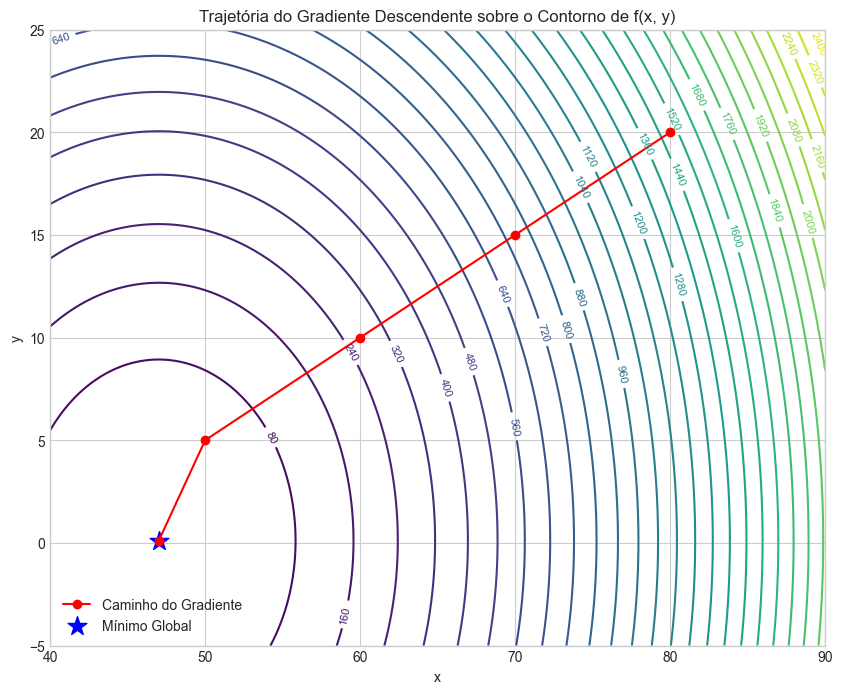

In [19]:
#TODO: implement this part of code
# Simulação de lista de pontos
path = np.array([[80, 20], [70, 15], [60, 10], [50, 5], [47, 0.1]])

# Criar um DataFrame com os pontos
df_path = pd.DataFrame(path, columns=['x', 'y'])

# Criar a grade para o gráfico de contorno
x_vals = np.linspace(40, 90, 400)
y_vals = np.linspace(-5, 25, 400)
X, Y = np.meshgrid(x_vals, y_vals)

# Calcular os valores da função em cada ponto da grade
Z = (X - 47)**2 + (Y - 0.1)**2 + 2

# Criar o gráfico de contorno
plt.figure(figsize=(10, 8))
contour = plt.contour(X, Y, Z, levels=30, cmap='viridis')
plt.clabel(contour, inline=True, fontsize=8)

# Plotar os pontos do gradiente descendente
plt.plot(df_path['x'], df_path['y'], marker='o', color='red', label='Caminho do Gradiente')
plt.scatter(47, 0.1, color='blue', marker='*', s=200, label='Mínimo Global')  # Ponto mínimo

# Adicionar rótulos
plt.title('Trajetória do Gradiente Descendente sobre o Contorno de f(x, y)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

### Finding the Optimal Step Size for Gradient Descent

### Symbolic Calculation of Optimal Step Size

We want to find the optimal step size $\alpha$ for a single gradient descent step from our starting point $\mathbf{x}_0 = (80, 20)$. We use symbolic mathematics to derive an exact solution.

First, we define our objective function:
$$f(\mathbf{x}) = (x - 47)^2 + (y - 0.1)^2 + 2$$

The gradient of this function is:
$$\nabla f(\mathbf{x}) = \begin{pmatrix} 2(x - 47) \\ 2(y - 0.1) \end{pmatrix}$$

For our starting point $\mathbf{x}_0 = (80, 20)$, the gradient is:
$$\nabla f(\mathbf{x}_0) = \begin{pmatrix} 2(80 - 47) \\ 2(20 - 0.1) \end{pmatrix} = \begin{pmatrix} 66 \\ 39.8 \end{pmatrix}$$

The next point in gradient descent is given by:
$$\mathbf{x}_1 = \mathbf{x}_0 - \alpha \nabla f(\mathbf{x}_0)$$

Substituting our values:
$$\mathbf{x}_1 = \begin{pmatrix} 80 \\ 20 \end{pmatrix} - \alpha \begin{pmatrix} 66 \\ 39.8 \end{pmatrix} = \begin{pmatrix} 80 - 66\alpha \\ 20 - 39.8\alpha \end{pmatrix}$$

Now we define a function $\phi(\alpha)$ which is our objective function evaluated at $\mathbf{x}_1$:
$$\phi(\alpha) = f(\mathbf{x}_1) = (80 - 66\alpha - 47)^2 + (20 - 39.8\alpha - 0.1)^2 + 2$$

Simplifying:
$$\phi(\alpha) = (33 - 66\alpha)^2 + (19.9 - 39.8\alpha)^2 + 2$$

To find the optimal $\alpha$, we take the derivative of $\phi(\alpha)$ with respect to $\alpha$ and set it to zero:
$$\frac{d\phi}{d\alpha} = -2 \cdot 66 \cdot (33 - 66\alpha) - 2 \cdot 39.8 \cdot (19.9 - 39.8\alpha) = 0$$

Simplifying:
$$-132(33 - 66\alpha) - 79.6(19.9 - 39.8\alpha) = 0$$
$$-4356 + 8712\alpha - 1584.04 + 3168.08\alpha = 0$$
$$11880.08\alpha = 5940.04$$
$$\alpha = 0.5$$

Therefore, the optimal step size for the first iteration of gradient descent is 0.5.

### creating a function that perform the GD algorithm

#### implement the GD algorithm, with options to fixed alpha, backtracking line search (Armijo and Wolfe Conditions)

In [20]:
def gradient_descent(f, grad_f, x0, alpha_type='fixed', alpha=0.01,
                     max_steps=1000, tolerance=0.0001,
                     c1=1e-4, rho=0.5, max_line_search_iter=20):
    """
    Gradient descent optimization algorithm.

    Parameters:
    -----------
    f : function
        The objective function to minimize, should take a numpy array as input.
    grad_f : function
        The gradient of the objective function, should take a numpy array as input.
    x0 : numpy array
        The starting point.
    alpha_type : str, optional
        Type of step size: 'fixed' or 'backtracking'. Default is 'fixed'.
    alpha : float, optional
        Step size for fixed alpha. Default is 0.01.
    max_steps : int, optional
        Maximum number of iterations. Default is 1000.
    tolerance : float, optional
        Convergence tolerance based on the norm of the difference. Default is 0.0001.
    c1 : float, optional
        Parameter for the Armijo condition in backtracking line search. Default is 1e-4.
    rho : float, optional
        Step size reduction factor for backtracking line search. Default is 0.5.
    max_line_search_iter : int, optional
        Maximum number of backtracking iterations. Default is 20.

    Returns:
    --------
    X : numpy array
        The final solution point.
    f_values : list
        Function values at each iteration.
    path : list of numpy arrays
        The path taken by the algorithm.
    num_steps : int
        Number of steps taken to converge.
    """
    #TODO: implement this part of code
    x = x0.astype(float)
    f_values = [f(x)]
    path = [x.copy()]

    for step in range(max_steps):
        grad = grad_f(x)
        direction = -grad

        if np.linalg.norm(direction) < tolerance:
            break

        if alpha_type == 'fixed':
            step_size = alpha

        elif alpha_type == 'backtracking':
            step_size = alpha
            fx = f(x)
            for _ in range(max_line_search_iter):
                x_new = x + step_size * direction
                if f(x_new) <= fx + c1 * step_size * np.dot(grad, direction):
                    break
                step_size *= rho

        else:
            raise ValueError("alpha_type must be 'fixed' or 'backtracking'")

        x_new = x + step_size * direction

        if np.linalg.norm(x_new - x) < tolerance:
            x = x_new
            f_values.append(f(x))
            path.append(x.copy())
            break

        x = x_new
        f_values.append(f(x))
        path.append(x.copy())

    return x, f_values, path, step + 1

In [21]:
# Example usage:
# Define your function and its gradient
def f_example(X):
    x, y = X
    return (x-47)**2 + (y-0.1)**2 + 2

def grad_f_example(X):
    x, y = X
    return np.array([2*(x-47), 2*(y-0.1)])

#TODO: implement this part of code

In [22]:
def plot_convergence_path(func, path, title, x_range=[-2, 2], y_range=[-2, 2]):
    # Gera uma malha de pontos no plano
    x = np.linspace(x_range[0], x_range[1], 400)
    y = np.linspace(y_range[0], y_range[1], 400)
    X, Y = np.meshgrid(x, y)

    # Calcula os valores da função para cada ponto (para o gráfico de contorno)
    Z = np.array([[func([x, y]) for x, y in zip(row_x, row_y)]
                  for row_x, row_y in zip(X, Y)])

    # Converte a trajetória em arrays
    path = np.array(path)

    # Plota o gráfico de contorno da função
    plt.figure(figsize=(8,6))
    contour = plt.contour(X, Y, Z, levels=50, cmap='viridis')
    plt.colorbar(contour)

    # Plota a trajetória do algoritmo
    plt.plot(path[:, 0], path[:, 1], 'ro-', label='Caminho do gradiente')
    plt.scatter(path[0, 0], path[0, 1], color='blue', label='Início')
    plt.scatter(path[-1, 0], path[-1, 1], color='green', label='Fim')

    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

#### show the results of your method for following cases:

- $$f(x) = \sum_{i=1}^{n-1}[100(x_{i+1}-x_i^2)^2+(1-x_i)^2], n = 5$$

- $$ f(x,y) = (x+2y-7)^2 + (2x+y-5)^2 $$

- $$ f(x,y) = (x^2 + y - 11)^2 + (x+y^2-7)^2 $$

- $$ f(x,y) = 2x^2 - 1.05x^4 + \frac{x^6}{6} + xy + y^2$$

- $$ f(x,y) = sin(x+y) + (x-y)^2 - 1.5x + 2.5y + 1 $$

You need to test, for all cases:

different values for fixed alpha, different initial points.

backtracking line search, only 1 initial point for each function, Armijo and Wolfe Conditions.

present the results in a nice visual format.

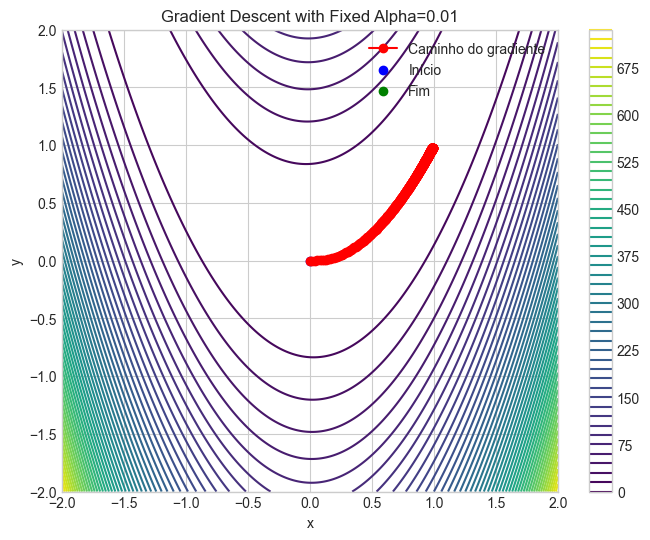

In [23]:
#Function to calculate Gradient of given function
#Using Forward Difference Method
def grad(x):
    value = np.zeros(len(x))
    xd = x.copy()
    h = 10**-6
    for j in range(len(x)):
        xd[j] = x[j] + h
        value[j] = (func(xd) - func(x))/h
        xd = x.copy()
    return value

#Function for calculating Function Value
def func(x):
    return 20*(x[1] - x[0]**2)**2 + (1 - x[0])**2

result = gradient_descent(func, grad, np.array([0.0, 0.0]), alpha_type='fixed', alpha=0.01)
plot_convergence_path(func, result[2], "Gradient Descent with Fixed Alpha=0.01", x_range = [-2,2], y_range = [-2,2])

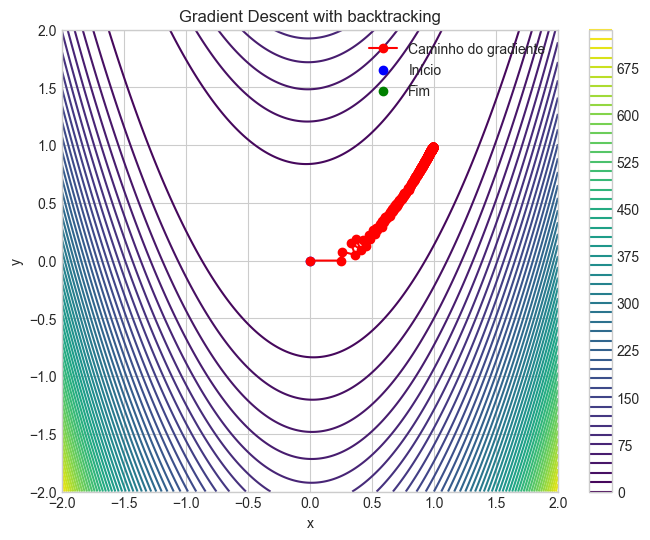

In [24]:
result = gradient_descent(func, grad, np.array([0.0, 0.0]), alpha_type='backtracking', alpha=1.0)
plot_convergence_path(func, result[2], "Gradient Descent with backtracking", x_range = [-2,2], y_range = [-2,2])